In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Interpolation

## Polynomial interpolation

Interpolation Theorem: Through $n+1$ distinkt points $(x_i,y_i)$, $0\le i \le n$, there is a unique polynomial $p$ of degree $n$ satisfying $p(x_i)=y_i$. 

Interpolation polynomial:

$$p(x)=a_n x^n+a_{n-1}x^{n-1}+ \dots + a_1 x + a_0$$

we get a system of linear equations in the coefficients $a_k$. The system in matrix-vector form reads the following multiplication:

$$\begin{bmatrix}
x_0^n & x_0^{n-1} & \dots & x_0 & 1\\
x_1^n & x_1^{n-1} & \dots & x_1 & 1\\
\vdots & \vdots & & \vdots & \vdots\\
x_n^n & x_n^{n-1} & \dots & x_n & 1
\end{bmatrix}
\begin{bmatrix}
a_n\\
a_{n-1}\\
\vdots\\
a_0
\end{bmatrix}=
\begin{bmatrix}
y_0\\
y_1\\
\vdots\\
y_n
\end{bmatrix}$$

We have to solve this system for $a_k$ to construct the interpolant p(x). The matrix on the left is commonly referred to as a [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix).

We pick $n=5$ random points:

In [2]:
n=5;
x=np.arange(n+1);
y=10*np.random.rand(n+1);
A = np.linalg.solve(np.vander(x), y)
print(A) 
np.allclose(np.dot(np.vander(x), A), y)

[ 0.09825015 -1.03035907  3.4116904  -3.41437809 -2.14802657  9.8557908 ]


True

A much more elegant way of doing polynomial fit is [Lagrange polynomials](https://en.wikipedia.org/wiki/Lagrange_polynomial), which is also used in `numpy.polyfit()` function.

`polyfit` returns the coefficients of the interpolating polynomial, polyval evaluates the polynomial on a given vector:

In [3]:
p = np.polyfit(x, y, n)  #polynomial of degree n
p

array([ 0.09825015, -1.03035907,  3.4116904 , -3.41437809, -2.14802657,
        9.8557908 ])

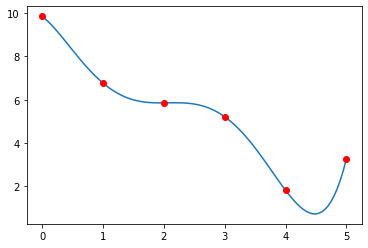

In [4]:
x1 = np.linspace(0, n, 100);
y1 = np.polyval(p, x1);
plt.plot(x1, y1);
plt.plot(x,y,'ro')


### Lagrange Polynominals

Polynominal Interpolation assumes a linear combination of the polynominals $p_k$:

$$P_n = \sum_{k=0}^n c_k p_k(x)$$

where we used $p_k = x^k$ for $(k=0,1,\dots,n)$. Now we use popynominals of n-th degree for all polynominals. 

Lagrange Polynominals:

$$L_k(x)=\prod_{i=0,i\ne k}^n \frac{x-x_i}{x_k-x_i}$$

for $(k=0,1,\dots,n)$. 

For illustration lets assume the interpolation problem for $x_0=-2$, $x_1=0$, and $x_2=1$. The lagrange polynominals are:

$$L_0(x)=\prod_{i=1}^2 \frac{x-x_i}{x_0-x_i}=\frac{(x-0)(x-1)}{(-2-0)(-2-1)}=\frac{x(x-1)}{6}$$

$$L_1(x)=\prod_{i=0,i\ne 1}^2 \frac{x-x_i}{x_1-x_i}=\frac{(x+2)(x-1)}{(0+2)(0-1)}=-\frac{(x+2)(x-1)}{2}$$

$$L_2(x)=\prod_{i=0}^1 \frac{x-x_i}{x_2-x_i}=\frac{(x+2)(x-0)}{(1+2)(1-0)}=\frac{(x+2)x}{3}$$

Plotting those polynominals illustrates the main property of lagrange polynominals:

$$L_k(x_i)=
\begin{cases} 
1 & \mbox{if } i = k \\ 
0 & \mbox{if } i \ne k 
\end{cases} $$

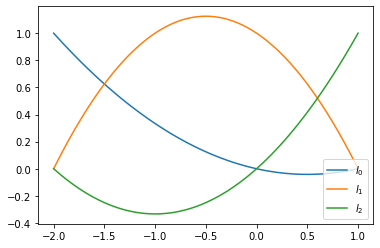

In [5]:
x = np.linspace(-2, 1, 100)
l0 = x*(x-1)/6
l1 = -(x+2)*(x-1)/2
l2 = (x+2)*x/3
plt.plot(x, l0, label=r'$l_0$')
plt.plot(x, l1, label=r'$l_1$')
plt.plot(x, l2, label=r'$l_2$')
plt.legend(loc='lower right')
plt.show()

Because of this property, the interpolation polynom 

$$P_n(x_i) = \sum_{k=0}^n c_k L_k(x_i)=c_i$$

returns exactly $c_i$ for each $x_i$. Replacing the coefficients of the linear combination $c_i$ with the functional values $f_i$ we obtain the Lagrange Interpolation Polynominal:

$$P_n(x) = \sum_{k=0}^n f_k L_k(x)$$

Example: Interpolation polynominal for $y=\sin(x)$ given by the data $0,0$, $\pi/2,1$, and $\pi,0$. The Lagrange popynominals are:

$$L_0(x)=\prod_{i=1}^2 \frac{x-x_i}{x_0-x_i}=\frac{(x-\frac{\pi}{2})(x-\pi)}{(0-\frac{\pi}{2})(0-\pi)}=\frac{(x-\frac{\pi}{2})(x-\pi)}{\frac{1}{2}\pi^2}$$

$$L_1(x)=\prod_{i=0,i\ne 1}^2 \frac{x-x_i}{x_1-x_i}=\frac{(x-0)(x-\pi)}{(\frac{\pi}{2}-0)(\frac{\pi}{2}-\pi)}=\frac{x(x-\pi)}{-\frac{1}{4}\pi^2}$$

$$L_2(x)=\prod_{i=0}^1 \frac{x-x_i}{x_2-x_i}=\frac{(x-0)(x-\frac{\pi}{2})}{(\pi-0)(\pi-\frac{\pi}{2})}=\frac{x(x-\frac{\pi}{2})}{\frac{1}{2}\pi^2}$$

This gives the Interpolation polynominal 

$$
\begin{align*}
P_2(x)&=0*L_0 + 1*L_1 + 0*L_2\\
      &=0*\frac{(x-\frac{\pi}{2})(x-\pi)}{\frac{1}{2}\pi^2} + 1*\frac{x(x-\pi)}{-\frac{1}{4}\pi^2} + 0*\frac{x(x-\frac{\pi}{2})}{\frac{1}{2}\pi^2}\\
      &=\frac{x(x-\pi)}{-\frac{1}{4}\pi^2}=-\frac{4}{\pi^2}x^2+\frac{4}{\pi}x
\end{align*}$$

The quadratic interpolation function and the sin function can be seen in the plot below.

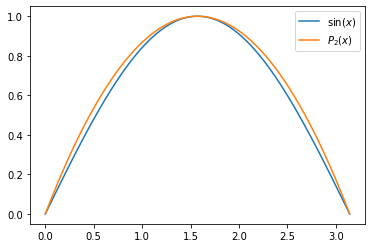

In [6]:
x = np.linspace(0, np.pi, 100)
y = np.sin(x)
p2 = -4/np.pi**2 *x**2 + 4/np.pi*x 
plt.plot(x, y, label=r'$\sin(x)$')
plt.plot(x, p2, label=r'$P_2(x)$')
plt.legend()
plt.show()

Adding points unfortunately increases the polynominal degree and requires recalculation. Lets say we have the supporting points $(0,0)$, $(\frac{\pi}{2},1)$, $(\pi,0)$, and $(\frac{3\pi}{2},-1)$.

Lagrange polynominal 3rd degree:

$$L_0(x)=\prod_{i=1}^3 \frac{x-x_i}{x_0-x_i}=\frac{(x-\frac{\pi}{2})(x-\pi)(x-\frac{3\pi}{2})}{(0-\frac{\pi}{2})(0-\pi)(0-\frac{3\pi}{2})}=\frac{(x-\frac{\pi}{2})(x-\pi)(x-\frac{3\pi}{2})}{-\frac{3}{4}\pi^3}$$

$$L_1(x)=\prod_{i=0,i\ne 1}^3 \frac{x-x_i}{x_1-x_i}=\frac{(x-0)(x-\pi)(x-\frac{3\pi}{2})}{(\frac{\pi}{2}-0)(\frac{\pi}{2}-\pi)(\frac{\pi}{2}-\frac{3\pi}{2})}=\frac{x(x-\pi)(x-\frac{3\pi}{2})}{\frac{1}{4}\pi^3}$$

$$L_2(x)=\prod_{i=0,i\ne 2}^3 \frac{x-x_i}{x_2-x_i}=\frac{(x-0)(x-\frac{\pi}{2})(x-\frac{3\pi}{2})}{(\pi-0)(\pi-\frac{\pi}{2})(\pi-\frac{3\pi}{2})}=\frac{x(x-\frac{\pi}{2})(x-\frac{3\pi}{2})}{-\frac{1}{4}\pi^3}$$

$$L_3(x)=\prod_{i=0}^2 \frac{x-x_i}{x_2-x_i}=\frac{(x-0)(x-\frac{\pi}{2})(x-\pi)}{(\frac{3\pi}{2}-0)(\frac{3\pi}{2}-\frac{\pi}{2})(\frac{3\pi}{2}-\pi)}=\frac{x(x-\frac{\pi}{2})(x-\pi)}{\frac{3}{4}\pi^3}$$

This gives the Interpolation polynominal 

$$
\begin{align*}
P_3(x)&=0*L_0 + 1*L_1 + 0*L_2 - 1*L_3\\
      &=\frac{x(x-\pi)(x-\frac{3\pi}{2})}{\frac{1}{4}\pi^3}-1*\frac{x(x-\frac{\pi}{2})(x-\pi)}{\frac{3}{4}\pi^3}\\
      &=\frac{8}{3\pi^3}x(x-\pi)(x-2\pi)
\end{align*}$$

Alternatively, the function `lagrange_interpolation` calculates the interpolation numerically. 

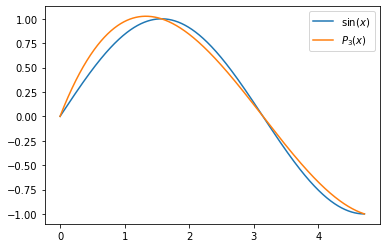

In [7]:
def lagrange_interpolation(x,y,xx):
    n = len(x)
    sum = 0
    for i in range(n):
        product = y[i]
        for j in range(n):
            if i != j:
                product = product*(xx - x[j])/(x[i]-x[j])
        sum = sum + product
    return sum
xi = np.array([0, np.pi/2, np.pi, 3*np.pi/2])
yi = np.array([0, 1, 0, -1])
x = np.linspace(0, 3*np.pi/2, 100)
y = np.sin(x)
p = lagrange_interpolation(xi,yi,x)
#p = 8/(3*np.pi**3)*x*(x-np.pi)*(x-2*np.pi)
plt.plot(x, y, label=r'$\sin(x)$')
plt.plot(x, p, label=r'$P_3(x)$')
plt.legend()
plt.show()

The **error of the interpolation** is the difference of the function and the polyniminal in between the supporting points.

$$f(x)-P_n(x)=R_n(x)=\frac{f^{(n+1)}(\xi(x))}{(n+1)!}(x-x_0)(x-x_1)\dots(x-x_n)$$

where $R_n(x)$ is the reminder term of the interpolation. The parameter $\xi(x)$ has the property

$$\min\{x_0,x_1,\dots,x_n\}<\xi(x)<\max\{x_0,x_1,\dots,x_n\}$$

The max error for the $\sin$ function above can be obtained from the reminder term 

$$|\sin(x)-P_3(x)|=|R_3(x)|=\left|\frac{\sin^{(4)}(\xi(x))}{4!}\right|\left|(x-0)(x-\frac{\pi}{2})(x-\pi)(x-\frac{3\pi}{2})\right|$$

where $\sin^{(4)}(\xi(x))=\sin(\xi(x))$. In the interpolation interval $[0,3\pi/2]$ we have $0<\xi<3\pi/2$ and $|\sin(\xi)|\le 1$.

$$|\sin(x)-P_3(x)|\le\frac{1}{24}\left|x(x-\frac{\pi}{2})(x-\pi)(x-\frac{3\pi}{2})\right|$$

We need to find the extreme values of $x(x-\frac{\pi}{2})(x-\pi)(x-\frac{3\pi}{2})$ for the interpolation range $[0,3\pi/2]$. Necassary condition:

In [8]:
roots=np.roots([4,-9*np.pi,11/2*np.pi**2,-3/4*np.pi**3])
filter = np.logical_and(roots >= 0,roots <= 3*np.pi/2)
range_roots = roots[filter]
f=lambda x:x**4-3*np.pi*x**3+11/4*np.pi**2*x**2-3/4*np.pi**3*x
np.abs(f(range_roots)).max()

6.088068189625204

The upper bound for the interpolation error would be 
$$|\sin(x)-P_3(x)|\le\frac{6.088068189625204}{24}=0.2536695079010502$$

The max measured error is quite a bit lower:

In [9]:
np.abs(y-p).max()

0.18075821843554074

**Exercise**: Determine and plot the interpolation polynomial through $n$ equidistant points in the interval $[-5,5]$ for Runge's function

$$f(x)=\frac{1}{1+x^2}$$

In [10]:
f = lambda x : 1./(1 + x**2)
x1 = np.linspace(-5, 5, 100)
y1 = f(x1)

In [11]:
n = 13
x = np.linspace(-5, 5, n)
y = f(x)
p = np.polyfit(x, y, n-1)
y2 = np.polyval(p, x1)

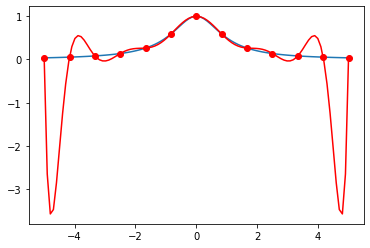

In [12]:
plt.plot(x1, y1)
plt.plot(x, y, 'ro')
plt.plot(x1, y2, 'r');

We see that the approximation is very bad near the endpoints of the interval. This can be seen from the formula for the interpolation error:

$$f(x) - p(x) = \frac{f^{(n+1)}(\xi)}{(n+1)!} \prod_{i=0}^n (x-x_i)$$

where the product is largest near the endpoints ([Runge's phenomenon](https://en.wikipedia.org/wiki/Runge%27s_phenomenon)). Hence polynomial interpolation usually is not a good idea.

A better approach is piecewise linear interpolation

## linear interpolation

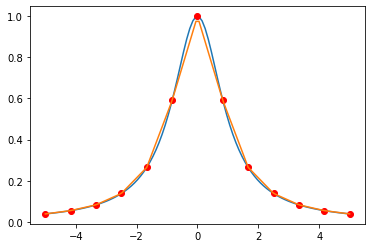

In [13]:
y3 = np.interp(x1,x, y)
plt.plot(x1, y1, x, y, 'ro', x1, y3)

## spline interpolation
or even better, cubic spline interpolation: here one determines piecewise cubic polynomials such that the resulting piecewise function and its first and second derivatives are continuous. There is a unique solution if in addition one specifies the second derivatives at the endpoints, e.g. setting them to zero (natural boundary conditions).

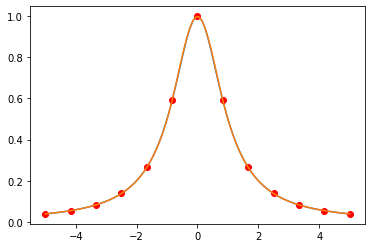

In [14]:
from scipy import interpolate
tck = interpolate.splrep(x, y)
y3 = interpolate.splev(x1, tck)
plt.plot(x1, y1, x, y, 'ro', x1, y3)

`scipy` separates the steps involved in spline interpolation into two operations, most likely for computational efficiency.

1. The coefficients describing the spline curve are computed, using `splrep()`. `splrep` returns an array of tuples containing the coefficients.
2. These coefficients are passed into `splev()` to actually evaluate the spline at the desired point $x$. $x$ can also be an array.

# Regression

Often one does not want to interpolate exactly, but is interested in a polynomial  of a given (low) order that fits the data best in the sense of least squares:

$$\text{rmse} := \sqrt{\frac{\sum_{i=0}^n (p(x_i) - y_i)^2}{n+1}} \rightarrow \text{min}$$

As an example, we generate data by adding random noise to a straight line and try to fit a linear polynomial (i.e. degree 1):

[1.93527545 1.38652504]


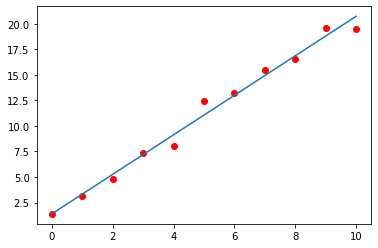

In [15]:
n=10
x = np.arange(n+1)
y = 1 + 2*x + np.random.randn(n+1)
p = np.polyfit(x, y, 1)
print(p)
x1 = np.linspace(0, 10, 100)
y1 = np.polyval(p, x1)
plt.plot(x, y, 'ro')
plt.plot(x1, y1)

### residual plot

A residual plot is a type of plot that displays the fitted values against the residual values for a regression model. This type of plot is often used to assess whether or not a linear regression model is appropriate for a given dataset and to check for heteroscedasticity of residuals.

For this example we’ll use a dataset that describes the attributes of 10 basketball players:

In [16]:
import pandas as pd

#create dataset
df = pd.DataFrame({'rating': [90, 85, 82, 88, 94, 90, 76, 75, 87, 86],
                   'points': [25, 20, 14, 16, 27, 20, 12, 15, 14, 19],
                   'assists': [5, 7, 7, 8, 5, 7, 6, 9, 9, 5],
                   'rebounds': [11, 8, 10, 6, 6, 9, 6, 10, 10, 7]})

#view dataset
df

,rating,points,assists,rebounds
0,90,25,5,11
1,85,20,7,8
2,82,14,7,10
3,88,16,8,6
4,94,27,5,6
5,90,20,7,9
6,76,12,6,6
7,75,15,9,10
8,87,14,9,10
9,86,19,5,7


Residual Plot for Simple Linear Regression:

Suppose we fit a simple linear regression model using points as the predictor variable and rating as the response variable:

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#fit simple linear regression model
model = ols('rating ~ points', data=df).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     11.61
Date:                Sun, 03 Jan 2021   Prob (F-statistic):            0.00927
Time:                        15:08:56   Log-Likelihood:                -27.252
No. Observations:                  10   AIC:                             58.50
Df Residuals:                       8   BIC:                             59.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.0282      5.235     12.994      0.0

/Users/bochmann/Library/Caches/pypoetry/virtualenvs/math-so-rqA8CpC9-py3.8/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


We can create a residual vs. fitted plot by using the plot_regress_exog() function from the statsmodels library:

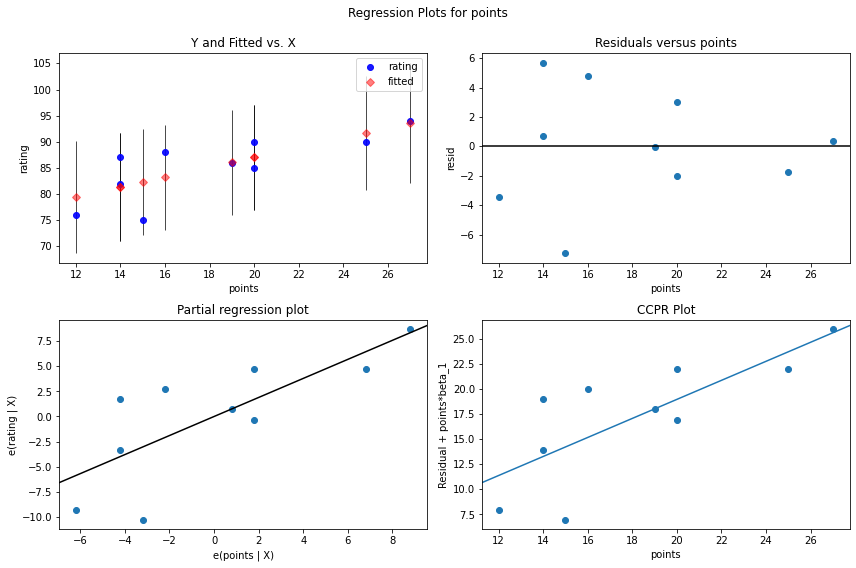

In [18]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'points', fig=fig)

Four plots are produced. The one in the top right corner is the residual vs. fitted plot. The x-axis on this plot shows the actual values for the predictor variable points and the y-axis shows the residual for that value.

Since the residuals appear to be randomly scattered around zero, this is an indication that heteroscedasticity is not a problem with the predictor variable.

